In [8]:
import uproot
import awkward as ak

import numpy as np
import matplotlib.pylab as plt

def getValues(array, key):
    return array.arrays([key], library="np")[key]

infile_name = "output/Prod-Secondaries.root"
infile = uproot.open(infile_name)
infile.classnames()

{'fragments;1': 'TH1F'}

In [15]:
ps = infile['fragments']
print(ps)
# print(f"Number of sings elements: {len(ps)}")
# print(sing.show())
# print(f"\n\nNumber of coins elements: {len(coin)}")
# print(coin.show())

<TH1F (version 2) at 0x7f43411a4f50>


In [137]:
eventID1 = getValues(coin, 'eventID1')
eventID2 = getValues(coin, 'eventID2')
time = getValues(coin, 'time1')
randoms = time[eventID1 != eventID2]


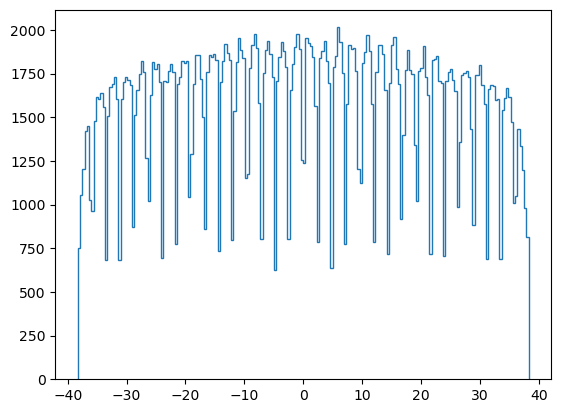

In [138]:
ad1 = getValues(coin, 'globalPosZ1')
ad2 = getValues(coin, 'globalPosZ2')
plt.hist(np.concatenate((ad1, ad2)), histtype='step', bins=200)
plt.show()

In [139]:
z = (ad1+ad2)*0.5
compt1 = getValues(coin, 'comptonPhantom1')
compt2 = getValues(coin, 'comptonPhantom2')
rayl1 = getValues(coin, 'RayleighPhantom1')
rayl2 = getValues(coin, 'RayleighPhantom2')
mask =  ((compt1==0) & (compt2==0) & (rayl1==0) & (rayl2==0))
tuc = z[mask]       # True unscattered coincidences (tuc)    
tsc = z[~mask]      # True scattered coincindences (tsc)


In [140]:
import re
stat_file = "stat.txt"
nb_eventsID = "# NumberOfEvents = "
fd = open(stat_file, 'r').read()
g = r'' + nb_eventsID + '\w+'     # binary + #NumberOfEvents + whatever follows
nb_events = int(re.search(g, fd).group(0)[len(nb_eventsID):])

In [141]:
print(f"{'Number of histories':40s}{nb_events}")
print(f"{'Number of singles':40s}{len(getValues(sing, 'runID'))}")
print(f"{'Number of coincidences':40s}{len(getValues(coin, 'runID'))}")
print(f"{'Number of randoms':40s}{len(randoms)}")
print(f"{'True unscattered coincindences':40s}{len(tuc)}")
print(f"{'True scattered coincindences':40s}{len(tsc)}")
print(f"{'Absolute sensibility':40s}{len(tuc)/nb_events*100:0.2f}%")


Number of histories                     32469086
Number of singles                       1041972
Number of coincidences                  156414
Number of randoms                       27
True unscattered coincindences          154911
True scattered coincindences            1503
Absolute sensibility                    0.48%
